[주제] 데이터 구조 설계 및 탐색적 데이터 분석 수행  
[내용] 본 과제의 경우 앞 과제들과 달리 새로운 데이터로 시작합니다. 이제 참여자들은 데이터 분석 컨설턴트 실무 담당자로서 고객사의 데이터에 대해 직접 접근하고 문제 정의 및 해결을 제시하는 업무를 수행한다고 가정합니다.
본 과제의 내용 및 목표는 다음과 같습니다.  
(내용)  
1. 현재 전산화를 신규로 진행해야 하는 기존 업체(수리업체)의 수리업부 진행관련 데이터에 대해 새롭게 데이터 마트를 구성해야 합니다  
2. 기존 데이터의 경우 전산화가 잘 이뤄지지 않아 매우 보기 난잡하고 관리가 되어 있지 않습니다.  
3. 따라서 참여자들은 데이터의 구조 설계 및 데이터의 탐색적 분석 업무를 수행하고 해당 결과를 고객사에게 설명 및 제공합니다.  
  
1) 제공되는 데이터에 대해 새로운 데이터 구조(ERD)를 개념적으로 구축하고 각 데이터(table)에 대한 관계도를 정리  
2) 데이터상에서 현재 해당업체가 가지고 있는 문제(as - is )를 파악하고 내용을 정리  
3) 파악한 문제(as - is)에 대한 해결 방법(to -be)제시 및 해당 과정을 통해 나오는 탐색적 데이터 분석 결과를 같이 정리  
4) PPT 작성, 양식 자유, 최대 10페이지(간지 불요), 모델 설계 관련 코드의 경우 별도 제출(주석 작성 권장)  

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows=100
pd.options.display.max_columns=100

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
df = pd.read_csv('./4th_data.csv')
print(df.shape)
df.head()

(13262, 12)


,caseID,taskID,originator,eventtype,timestamp,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
0,1,FirstContact,Dian,complete,1970-01-02 08:08,Phone,NaN,NaN,NaN,NaN,NaN,NaN
1,1,MakeTicket,Dian,start,1970-01-02 08:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,MakeTicket,Dian,complete,1970-01-02 08:11,NaN,E,1340.0,NaN,NaN,NaN,NaN
3,1,ArrangeSurvey,Dian,start,1970-01-02 08:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,ArrangeSurvey,Dian,complete,1970-01-02 08:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ERD 위한 중요 컬럼 탐색 (→ taskID)

주어진 데이터셋은 특정 기준에 따라 정리된 것이 아닌, 특정 기준 없이 나열돼있다.  
**가장 중요한 컬럼을 key로 두고 위 데이터셋에서 가장 중요한 컬럼(가장 핵심적인 정보를 담고 있는)은 무엇일까?**  
직관적으로 taskID와 eventtype을 살펴보면 좋을 것 같다

In [3]:
df['taskID'].value_counts()

ArrangeSurvey             1854
Survey                    1854
MakeTicket                1854
InternRepair              1094
FirstContact              1000
ReadyInformClient          927
RepairReady                927
InformClientSurvey         927
SendTicketToFinAdmin       927
TicketReady                927
ImmediateRepair            766
ExternRepair               132
InformClientWrongPlace      73
Name: taskID, dtype: int64

In [4]:
df['eventtype'].value_counts()

complete    9419
start       3843
Name: eventtype, dtype: int64

두 컬럼을 살펴본 결과, taskID 컬럼에서 유의미한 정보들이 있음을 확인할 수 있다.  

**taskID 컬럼에는 해당 수리업체가 진행한 업무에 대한 내용을 담고 있으므로 데이터셋에서 가장 중요한 정보를 담고 있다고 볼 수 있다.**
  
**FirstContact	최초 연락  
MakeTicket	청구서생성  
ArrangeSurvey	상담내용정의  
InformClientSurvey	고객문의전산처리  
Survey	상담진행  
InternRepair	단순 수리  
RepairReady	수리종료  
SendTicketToFinAdmin	청구서발송 to 관리자  
ReadyInformClient	고객정보준비  
TicketReady	청구서송달  
ImmediateRepair	당업체 직접 수리  
ExternRepair	외부업체 수리  
InformClientWrongPlace	고객의 잘못된 정보**


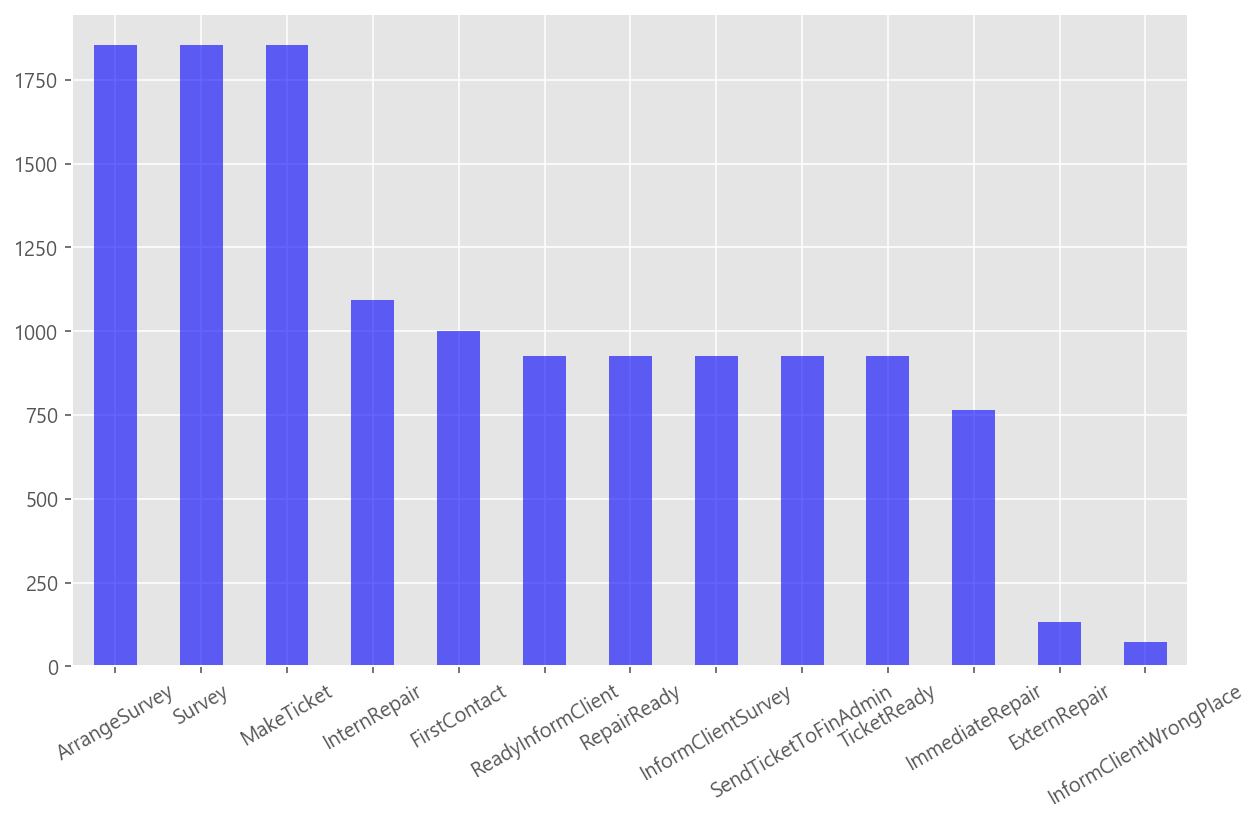

In [35]:
df['taskID'].value_counts().plot.bar(rot=30, figsize=(10, 6), color='b', alpha=0.6)

# 전처리 및 EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13262 entries, 0 to 13261
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caseID               13262 non-null  int64  
 1   taskID               13262 non-null  object 
 2   originator           13262 non-null  object 
 3   eventtype            13262 non-null  object 
 4   timestamp            13262 non-null  object 
 5   contact              1000 non-null   object 
 6   RepairType           927 non-null    object 
 7   objectKey            927 non-null    float64
 8   RepairInternally     927 non-null    object 
 9   EstimatedRepairTime  927 non-null    float64
 10  RepairCode           927 non-null    float64
 11  RepairOK             1854 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.2+ MB


In [7]:
df['timestamp'].value_counts()

1970-01-07 02:02    10
1970-01-03 02:45    10
1970-01-04 06:05    10
1970-01-03 10:51     9
1970-01-07 01:30     9
                    ..
1970-01-14 07:11     1
1970-01-06 21:03     1
1970-01-07 22:41     1
1970-01-05 21:08     1
1970-01-08 00:57     1
Name: timestamp, Length: 5538, dtype: int64

## timestamp 데이터를 날짜형데이터를 바꾼다 

In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head(3)

,caseID,taskID,originator,eventtype,timestamp,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
0,1,FirstContact,Dian,complete,1970-01-02 08:08:00,Phone,NaN,NaN,NaN,NaN,NaN,NaN
1,1,MakeTicket,Dian,start,1970-01-02 08:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,MakeTicket,Dian,complete,1970-01-02 08:11:00,NaN,E,1340.0,NaN,NaN,NaN,NaN


## 결측치 확인

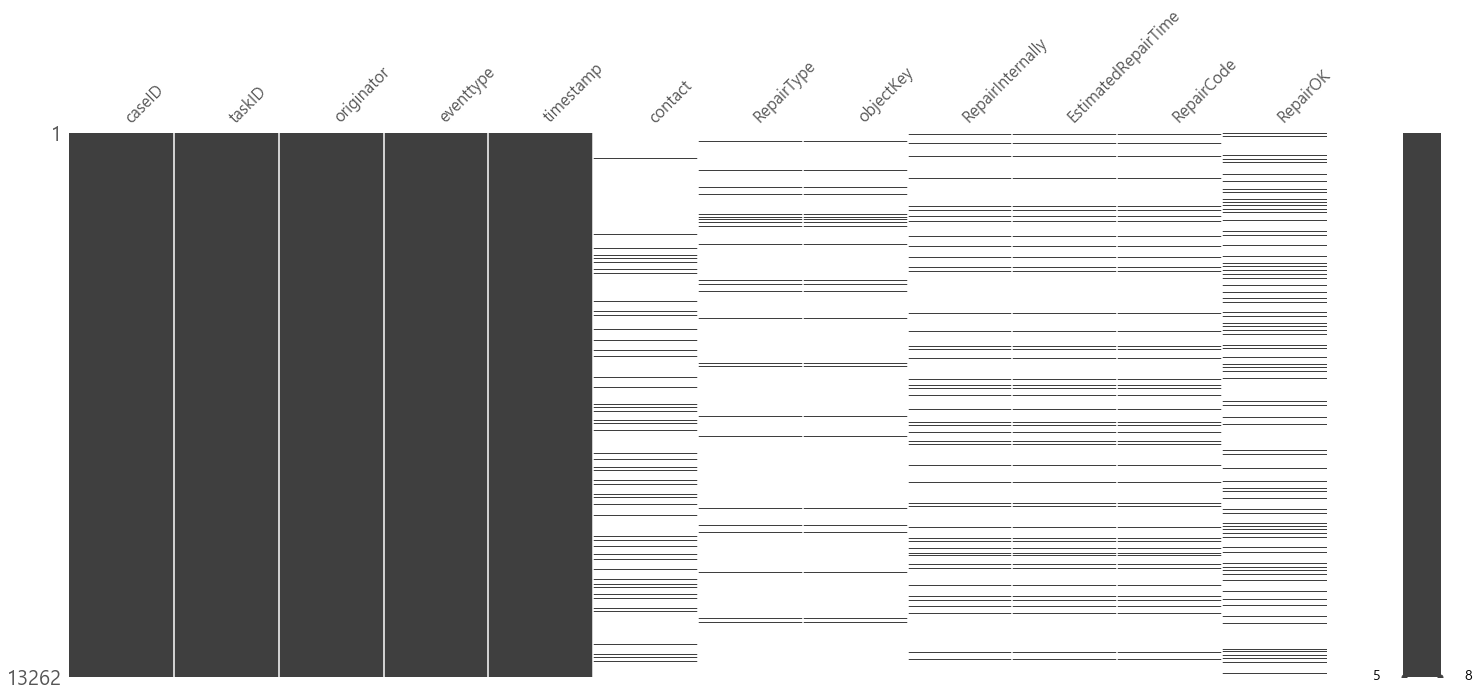

In [9]:
import missingno as msno
msno.matrix(df)

In [10]:
df.isnull().sum()[df.isnull().sum()>0]

contact                12262
RepairType             12335
objectKey              12335
RepairInternally       12335
EstimatedRepairTime    12335
RepairCode             12335
RepairOK               11408
dtype: int64

caseID, taskID, originator, eventype, timestamp를 제외한 나머지 컬컴은 결측치가 압도적으로 많다.  
왜 그럴까?  
해당 데이터셋의 결측치를 단순히 무의미하다고 보면 안될 것 같다. taskID의 value인 업무 내용들을 살펴보면, 최초 연락만 진행하거나 상담진행, 고객문의전산처리 등 실제로 수리를 진행하지 않은 업무도 많다.
<br>

<br/>


**즉, taskID에서 '수리'업무가 아닌 업무를 한 경우 contact와 RepairType, RepairOK 등 수리와 관련된 컬럼들이 NaN으로 되어있을 것이다. 이를 확인하기 위해 groupby 함수로 데이터를 재구조화해본다.**

## taskID로 재구조화

In [11]:
df.head(1)

,caseID,taskID,originator,eventtype,timestamp,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
0,1,FirstContact,Dian,complete,1970-01-02 08:08:00,Phone,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_task = df.groupby('taskID')[['RepairType', 'objectKey', 'RepairInternally', 'EstimatedRepairTime',
                      'RepairCode', 'RepairOK']].count()
df_task

,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
taskID,,,,,,
ArrangeSurvey,0,0,0,0,0,0
ExternRepair,0,0,0,0,0,0
FirstContact,0,0,0,0,0,0
ImmediateRepair,0,0,0,0,0,0
InformClientSurvey,0,0,0,0,0,0
InformClientWrongPlace,0,0,0,0,0,0
InternRepair,0,0,0,0,0,0
MakeTicket,927,927,0,0,0,0
ReadyInformClient,0,0,0,0,0,927


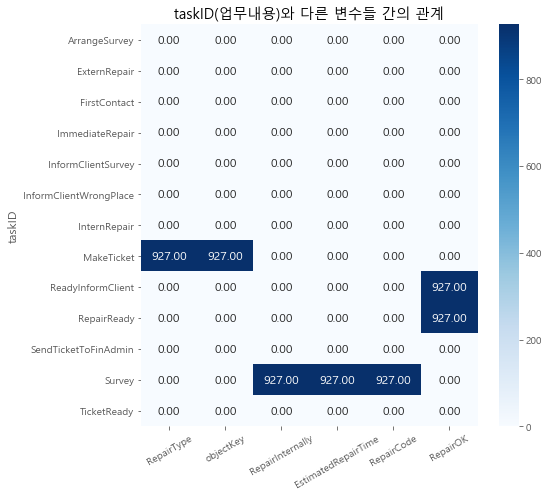

In [13]:
plt.figure(figsize=(8,7))
sns.heatmap(df_task,
           annot=True,
           annot_kws={'size':12},
           fmt='.2f',
           cmap=plt.cm.Blues)
plt.title('taskID(업무내용)와 다른 변수들 간의 관계')
plt.xticks(rotation=30)
plt.tight_layout()

**(1) objectKey는 MakeTicket(청구서생성)시에만 발생한다.  
(2) RepairType은 MakeTicket(청구서생성)시에만 발생한다.  
(3) RepairInternally와 EstimateRepairTime, RepairCode는 Survey(상담진행)시에만 발생한다.  
(4) RepairOK는 ReadyInformClinet(고객정보준비) or RepairReady(수리종료)시에만 발생한다.**  
<Br>
    이유가 뭘까? caseID별로 확인해보자
    <Br/>

# 현재의 문제(as-is)

## 문제 (1) RepairOK가 True로 들어가는 시점이 직관적이지 않다

In [14]:
df.loc[df['caseID']==1].sort_values(by='timestamp')

,caseID,taskID,originator,eventtype,timestamp,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
0,1,FirstContact,Dian,complete,1970-01-02 08:08:00,Phone,NaN,NaN,NaN,NaN,NaN,NaN
1,1,MakeTicket,Dian,start,1970-01-02 08:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,MakeTicket,Dian,complete,1970-01-02 08:11:00,NaN,E,1340.0,NaN,NaN,NaN,NaN
3,1,ArrangeSurvey,Dian,start,1970-01-02 08:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,ArrangeSurvey,Dian,complete,1970-01-02 08:16:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,InformClientSurvey,System,complete,1970-01-02 08:16:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,Survey,Cindy,start,1970-01-11 21:33:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,Survey,Cindy,complete,1970-01-11 21:56:00,NaN,NaN,NaN,True,240.0,1.0,NaN
8,1,InternRepair,John,start,1970-01-17 04:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,InternRepair,John,complete,1970-01-17 08:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(1) 수리 업무는 시간순, 정해진 절차순으로 진행된다.  
(2) 위에서 확인했던 것처럼 RepairReady(수리종료)와 ReadyInformClient(고객정보준비) 과정에서 RepairOK에 값이 들어간다.  


In [15]:
# taskID(업무내용)이 '당업체 직접 수리'인 경우
print(len(df.loc[df['taskID']=='ImmediateRepair']))

# taskID(업무내용)이 '외부업체 수리'인 경우
print(len(df.loc[df['taskID']=='ExternRepair']))

# taskID(업무내용)이 '단순 수리'인 경우
print(len(df.loc[df['taskID']=='InternRepair']))

766
132
1094


수리에는 '당업체 직접 수리', '외부업체 수리', '단순 수리'한 경우들도 있는데 이 세 가지 경우의 수리는 'RepairCode', 'RepairOK' 등 수리와 관련된 컬럼값이 모두 NaN으로 채워져있다.  
**왜냐하면, 최종적으로 RepairReady라는 컬럼에서 RepairOK에 값이 들어가기 때문이다.  
--> RepairOK는 RepairReady 과정에서 값이 들어가고 있는데, 데이터명이 직관적이지 않다.  
RepairCompleted로 바꾸는 게 나을 것이다.**

## 문제 (2) 데이터 컬럼 순서가 직관적이지 않다

In [16]:
df.head()

,caseID,taskID,originator,eventtype,timestamp,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
0,1,FirstContact,Dian,complete,1970-01-02 08:08:00,Phone,NaN,NaN,NaN,NaN,NaN,NaN
1,1,MakeTicket,Dian,start,1970-01-02 08:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,MakeTicket,Dian,complete,1970-01-02 08:11:00,NaN,E,1340.0,NaN,NaN,NaN,NaN
3,1,ArrangeSurvey,Dian,start,1970-01-02 08:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,ArrangeSurvey,Dian,complete,1970-01-02 08:16:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


날짜가 제일 앞에 오고 그 다음에 caseID, 그리고 담당 originator와 업무 내용 순으로 이어지는 게 좀 더 직관적일 것이다.

## 문제 (3) taskID에 불필요한 데이터가 존재한다

In [17]:
df.groupby('taskID').count()

,caseID,originator,eventtype,timestamp,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
taskID,,,,,,,,,,,
ArrangeSurvey,1854,1854,1854,1854,0,0,0,0,0,0,0
ExternRepair,132,132,132,132,0,0,0,0,0,0,0
FirstContact,1000,1000,1000,1000,1000,0,0,0,0,0,0
ImmediateRepair,766,766,766,766,0,0,0,0,0,0,0
InformClientSurvey,927,927,927,927,0,0,0,0,0,0,0
InformClientWrongPlace,73,73,73,73,0,0,0,0,0,0,0
InternRepair,1094,1094,1094,1094,0,0,0,0,0,0,0
MakeTicket,1854,1854,1854,1854,0,927,927,0,0,0,0
ReadyInformClient,927,927,927,927,0,0,0,0,0,0,927


RepairType부터 RepairOK까지 6개의 컬럼이 모두 0인 (NaN)인 taskID의 값들을 살펴보자.  
이중 굳이 데이터로 축적하지 않아도 될 것 같은 value는  
**ArangeSurvey(상담내용정의), ReadyInformClient(고객정보준비)**이다.

# 해결방법(to-be)

## 데이터셋의 컬럼 순서를 보다 직관적으로 바꾼다

In [18]:
df.head()

,caseID,taskID,originator,eventtype,timestamp,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
0,1,FirstContact,Dian,complete,1970-01-02 08:08:00,Phone,NaN,NaN,NaN,NaN,NaN,NaN
1,1,MakeTicket,Dian,start,1970-01-02 08:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,MakeTicket,Dian,complete,1970-01-02 08:11:00,NaN,E,1340.0,NaN,NaN,NaN,NaN
3,1,ArrangeSurvey,Dian,start,1970-01-02 08:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,ArrangeSurvey,Dian,complete,1970-01-02 08:16:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data = df.copy()

In [20]:
col = ['timestamp', 'caseID', 'originator', 'taskID', 'eventtype', 
      'contact', 'RepairType', 'objectKey', 'RepairInternally', 'EstimatedRepairTime',
       'RepairCode', 'RepairOK']
data = data[col]
data.head()

,timestamp,caseID,originator,taskID,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
0,1970-01-02 08:08:00,1,Dian,FirstContact,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-01-02 08:08:00,1,Dian,MakeTicket,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970-01-02 08:11:00,1,Dian,MakeTicket,complete,NaN,E,1340.0,NaN,NaN,NaN,NaN
3,1970-01-02 08:11:00,1,Dian,ArrangeSurvey,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970-01-02 08:16:00,1,Dian,ArrangeSurvey,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## taskID의 RepairReady를 ReapirCompleted로 바꾼다

In [21]:
def clean_data(value):
    return value.replace('RepairReady', 'RepairCompleted')

data['taskID'] = data['taskID'].apply(clean_data)
data.head(14)

,timestamp,caseID,originator,taskID,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
0,1970-01-02 08:08:00,1,Dian,FirstContact,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-01-02 08:08:00,1,Dian,MakeTicket,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970-01-02 08:11:00,1,Dian,MakeTicket,complete,NaN,E,1340.0,NaN,NaN,NaN,NaN
3,1970-01-02 08:11:00,1,Dian,ArrangeSurvey,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970-01-02 08:16:00,1,Dian,ArrangeSurvey,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1970-01-02 08:16:00,1,System,InformClientSurvey,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1970-01-11 21:33:00,1,Cindy,Survey,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1970-01-11 21:56:00,1,Cindy,Survey,complete,NaN,NaN,NaN,True,240.0,1.0,NaN
8,1970-01-17 04:36:00,1,John,InternRepair,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1970-01-17 08:12:00,1,John,InternRepair,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## taskID의 불필요한 데이터를 삭제한다

ArrangeSurvey(상담내용정의), ReadyInformClient(고객정보준비) 삭제

In [32]:
pd.options.display.max_rows=1000000
drop_index = data['taskID'].str.contains('ArrangeSurvey|ReadyInformClient')[data['taskID'].str.contains('ArrangeSurvey|ReadyInformClient')==True].index
data.drop(drop_index.tolist(), inplace=True)
print(data.shape)
data.head()

(10481, 12)


,timestamp,caseID,originator,taskID,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
0,1970-01-02 08:08:00,1,Dian,FirstContact,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-01-02 08:08:00,1,Dian,MakeTicket,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970-01-02 08:11:00,1,Dian,MakeTicket,complete,NaN,E,1340.0,NaN,NaN,NaN,NaN
5,1970-01-02 08:16:00,1,System,InformClientSurvey,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1970-01-11 21:33:00,1,Cindy,Survey,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
data.index = np.arange(10481).tolist()
data.head(14)

,timestamp,caseID,originator,taskID,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
0,1970-01-02 08:08:00,1,Dian,FirstContact,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-01-02 08:08:00,1,Dian,MakeTicket,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970-01-02 08:11:00,1,Dian,MakeTicket,complete,NaN,E,1340.0,NaN,NaN,NaN,NaN
3,1970-01-02 08:16:00,1,System,InformClientSurvey,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970-01-11 21:33:00,1,Cindy,Survey,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1970-01-11 21:56:00,1,Cindy,Survey,complete,NaN,NaN,NaN,True,240.0,1.0,NaN
6,1970-01-17 04:36:00,1,John,InternRepair,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1970-01-17 08:12:00,1,John,InternRepair,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1970-01-17 08:12:00,1,System,RepairCompleted,complete,NaN,NaN,NaN,NaN,NaN,NaN,True
9,1970-01-17 14:03:00,1,System,SendTicketToFinAdmin,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN
